# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# import datetime module
# from datetime import datetime

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
total_cities = len(cities)
total_cities

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
sample_city = "charlotte"
sample_response = requests.get(f"{url}&q={sample_city}").json()
print(sample_response)

{'coord': {'lon': -80.84, 'lat': 35.23}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 80.71, 'pressure': 1022, 'humidity': 48, 'temp_min': 78.01, 'temp_max': 84}, 'visibility': 16093, 'wind': {'speed': 8.05, 'deg': 10}, 'clouds': {'all': 20}, 'dt': 1564071126, 'sys': {'type': 1, 'id': 3648, 'message': 0.0115, 'country': 'US', 'sunrise': 1564050406, 'sunset': 1564101160}, 'timezone': -14400, 'id': 4460243, 'name': 'Charlotte', 'cod': 200}


In [4]:
# "coord""lat / lon", "main""humidity / temp_max / temp_min", "wind""speed", "clouds""all", 
# "dt", "sys""country","name"
city_name = []
cloudiness = []
country = []
utc_date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

count = 1

print(f"Beginning Data Retrieval")
print(f"-"*30)
for city in cities:  
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        # -------------------------
        # format date <-didn't work
        #u_dt = response["dt"]
        #dt = float("u_dt")
        #u_date = datetime.utcfromtimestamp("dt").strftime('Y%-%m-%d %H:%M:%S')
        #date.append(response["dt"])
        #--------------------------
        utc_date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {count} of {total_cities} cities  | {city_record}")
        count = count + 1
# 1 second API call
        time.sleep(1.01)
    except KeyError:
        print("City not found. Skipping this city...")
        total_cities = total_cities - 1
        time.sleep(1.01)
        
print("-"*30)
print("Data Retrieval Completed")
print("-"*30)

Beginning Data Retrieval
------------------------------
Processing Record 1 of 592 cities  | Quatre Cocos
Processing Record 2 of 592 cities  | Vaini
Processing Record 3 of 592 cities  | Labuhan
Processing Record 4 of 592 cities  | Puerto Carreno
Processing Record 5 of 592 cities  | Kavieng
Processing Record 6 of 592 cities  | Hermanus
Processing Record 7 of 592 cities  | Sola
Processing Record 8 of 592 cities  | Sao Jose da Coroa Grande
Processing Record 9 of 592 cities  | Klyuchi
Processing Record 10 of 592 cities  | Tezu
Processing Record 11 of 592 cities  | Punta Arenas
Processing Record 12 of 592 cities  | Newcastle
Processing Record 13 of 592 cities  | Puerto Ayora
Processing Record 14 of 592 cities  | Bluff
Processing Record 15 of 592 cities  | Sur
Processing Record 16 of 592 cities  | Airai
Processing Record 17 of 592 cities  | Tuktoyaktuk
Processing Record 18 of 592 cities  | Rikitea
Processing Record 19 of 592 cities  | East London
Processing Record 20 of 592 cities  | Belmont

City not found. Skipping this city...
Processing Record 160 of 577 cities  | Sitka
Processing Record 161 of 577 cities  | Chumikan
Processing Record 162 of 577 cities  | Kahului
Processing Record 163 of 577 cities  | Maltahohe
Processing Record 164 of 577 cities  | Tasiilaq
City not found. Skipping this city...
Processing Record 165 of 576 cities  | Praia da Vitoria
Processing Record 166 of 576 cities  | Barrow
Processing Record 167 of 576 cities  | Batagay-Alyta
Processing Record 168 of 576 cities  | Nicoya
City not found. Skipping this city...
Processing Record 169 of 575 cities  | Port Lincoln
Processing Record 170 of 575 cities  | Erdenet
Processing Record 171 of 575 cities  | Provideniya
Processing Record 172 of 575 cities  | Bathsheba
Processing Record 173 of 575 cities  | Bunia
City not found. Skipping this city...
Processing Record 174 of 574 cities  | Sobolevo
City not found. Skipping this city...
Processing Record 175 of 573 cities  | Capitan Bado
City not found. Skipping thi

Processing Record 307 of 548 cities  | Abalak
Processing Record 308 of 548 cities  | Gryazi
Processing Record 309 of 548 cities  | Nouadhibou
Processing Record 310 of 548 cities  | Nagato
City not found. Skipping this city...
Processing Record 311 of 547 cities  | Santiago
Processing Record 312 of 547 cities  | Yagodnoye
Processing Record 313 of 547 cities  | Hovd
Processing Record 314 of 547 cities  | Hobyo
Processing Record 315 of 547 cities  | Esperance
Processing Record 316 of 547 cities  | Eyl
Processing Record 317 of 547 cities  | Bambanglipuro
Processing Record 318 of 547 cities  | Cochabamba
Processing Record 319 of 547 cities  | Bambous Virieux
Processing Record 320 of 547 cities  | Kushalgarh
Processing Record 321 of 547 cities  | Witbank
Processing Record 322 of 547 cities  | Geraldton
Processing Record 323 of 547 cities  | Redlands
Processing Record 324 of 547 cities  | Umm Lajj
Processing Record 325 of 547 cities  | Anta
Processing Record 326 of 547 cities  | Liverpool
Pro

Processing Record 466 of 533 cities  | Bako
Processing Record 467 of 533 cities  | Xinqing
Processing Record 468 of 533 cities  | Tsiroanomandidy
Processing Record 469 of 533 cities  | Akureyri
Processing Record 470 of 533 cities  | Gwadar
Processing Record 471 of 533 cities  | Mnogovershinnyy
Processing Record 472 of 533 cities  | Miyako
Processing Record 473 of 533 cities  | Miles City
Processing Record 474 of 533 cities  | Chinsali
Processing Record 475 of 533 cities  | Channel-Port aux Basques
Processing Record 476 of 533 cities  | Ixtapa
Processing Record 477 of 533 cities  | Yilan
Processing Record 478 of 533 cities  | Kenai
Processing Record 479 of 533 cities  | Henties Bay
Processing Record 480 of 533 cities  | Voloshka
City not found. Skipping this city...
Processing Record 481 of 532 cities  | Kieta
Processing Record 482 of 532 cities  | Ajdabiya
Processing Record 483 of 532 cities  | Kumano
Processing Record 484 of 532 cities  | Kirakira
Processing Record 485 of 532 cities  

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_data = {
    "City" : city_name,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Humidity" : humidity,
    "Lat" : lat,
    "Long" : lng,
    "Max Temp" : max_temp,
    "Wind Speed" : wind_speed,
}

# display the df
df = pd.DataFrame(weather_data)

# As shown in example
df.count()

df.head()

,City,Cloudiness,Country,Humidity,Lat,Long,Max Temp,Wind Speed
0,Quatre Cocos,75,MU,83,-20.21,57.76,71.60,16.11
1,Vaini,40,IN,94,15.34,74.49,71.60,4.70
2,Labuhan,49,ID,87,-2.54,115.51,74.00,2.06
3,Puerto Carreno,40,CO,78,6.19,-67.49,82.40,3.36
4,Kavieng,100,PG,78,-2.57,150.80,81.74,10.89


In [6]:
# export to .csv
df.to_csv('output/weather_data.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

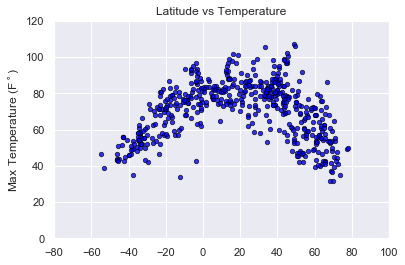

In [7]:
sns.set(color_codes=True)
sns.regplot(data=df, x = lat, y = max_temp, fit_reg=False, 
            scatter_kws={'facecolors': 'blue', 'linewidths': 0.75, 'edgecolors': 'black', 's': 20})
plt.xlim((-80, 100))
plt.ylim((0, 120))
plt.ylabel('Max Temperature (F$^\circ$)')
plt.title('Latitude vs Temperature')
plt.savefig('output/lat_temp.png')
plt.show();

#### Latitude vs. Humidity Plot

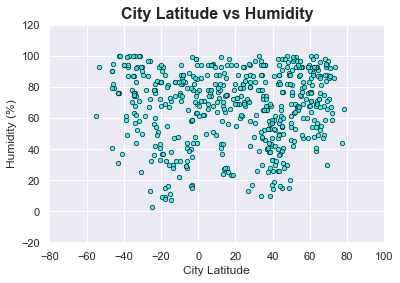

In [8]:
sns.set(color_codes=True)
sns.regplot(data=df, x=lat, y=humidity, fit_reg=False, 
            scatter_kws={'facecolors': 'aqua', 'linewidths': 0.75, 'edgecolors': 'black', 's': 20})
plt.xlim((-80, 100))
plt.ylim((-20, 120))
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity', weight="bold", fontsize=16)
plt.savefig('output/lat_hum.png')
plt.show();

#### Latitude vs. Cloudiness Plot

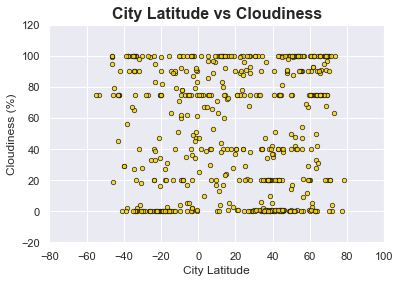

In [9]:
sns.set(color_codes=True)
sns.regplot(data=df, x=lat, y=cloudiness, fit_reg=False, 
            scatter_kws={'facecolors': 'gold', 'linewidths': 0.75, 'edgecolors': 'black', 's': 20})
plt.xlim((-80, 100))
plt.ylim((-20, 120))
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness', weight="bold", fontsize = 16)
plt.savefig('output/lat_cloud.png')
plt.show();

#### Latitude vs. Wind Speed Plot

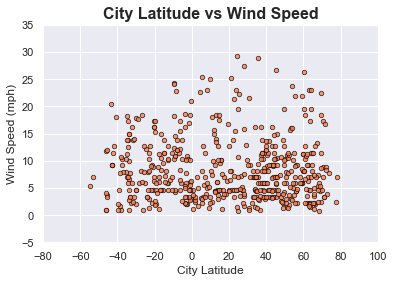

In [10]:
sns.set(color_codes=True)
sns.regplot(data=df, x = lat, y = wind_speed, fit_reg=False, 
            scatter_kws={'facecolors': 'coral', 'linewidths': 0.75, 'edgecolors': 'black', 's': 20})
plt.xlim((-80, 100))
plt.ylim((-5, 35))
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed', weight="bold", fontsize = 16)
plt.savefig('output/lat_wind.png')
plt.show();